# Распознавание лиц при помощи SVM и kernel trick

# Описание набора данных

В этом задании вам предлагается построить классификатор, обученный на изображениях лиц. Сначала загрузим необходимый набор данных и посмотрим, что он из себя представляет. 

Таблица содержит "распрямленные" представления изображений лиц людей.

Изначально каждое изображение — матрица размера $62 \times 47$, значения которой, предположительно, нормированы к диапазону $[0, 1]$ из диапазона $[0, 255] \cap \mathbb Z$. Сами значения отвечают за интенсивность пикселя: чем значение больше, тем пиксель светлее.

Обратите внимание, из картинки (или, что то же самое, матрицы) размера $62 \times 47$ получился вектор длины $2914 = 62 \cdot 47$.

Колонка <code>label</code> отвечает за имя человека, изображенного на картинке.

In [ ]:
df = pd.read_csv('/content/persons_pics_train.csv')
df.head()

0         1         2         3         4         5         6  \
0  0.379085  0.312418  0.352941  0.445752  0.466667  0.473203  0.484967   
1  0.450980  0.466667  0.512418  0.509804  0.450980  0.458824  0.516340   
2  0.589542  0.614379  0.688889  0.729412  0.738562  0.775163  0.789543   
3  0.390850  0.432680  0.499346  0.562091  0.597386  0.644444  0.670588   
4  0.645752  0.626144  0.605229  0.585621  0.602614  0.664052  0.701961   

          7         8         9  ...      2905      2906      2907      2908  \
0  0.513725  0.545098  0.571242  ...  0.597386  0.620915  0.732026  0.852288   
1  0.571242  0.607843  0.618301  ...  0.430065  0.453595  0.679739  0.934640   
2  0.806536  0.820915  0.837908  ...  0.733333  0.854902  0.937255  0.624837   
3  0.650980  0.637908  0.639216  ...  0.713726  0.898039  0.968627  0.959477   
4  0.709804  0.733333  0.771242  ...  0.115033  0.129412  0.132026  0.129412   

       2909      2910      2911      2912      2913          label  
0  0.921569  0.937255  0.941176  0.950327  0.946405  John Ashcroft  
1  0.985621  0.981699  0.963399  0.938562  0.874510   Ariel Sharon  
2  0.128105  0.082353  0.107190  0.095425  0.100654   Colin Powell  
3  0.832680  0.443137  0.266667  0.303268  0.313725  Jean Chretien  
4  0.155556  0.171242  0.167320  0.176471  0.183007   Colin Powell  

[5 rows x 2915 columns]

Убедимся в том, что перед нами действительно изображения лиц людей. Возьмем первые $15$ строк из таблицы исходных данных и построим соответствующие им изображения.

In [ ]:
import matplotlib.pyplot as plt

def get_img_by_row(row):
  return row.drop('label').astype(float).to_numpy().reshape(62,47), row['label']

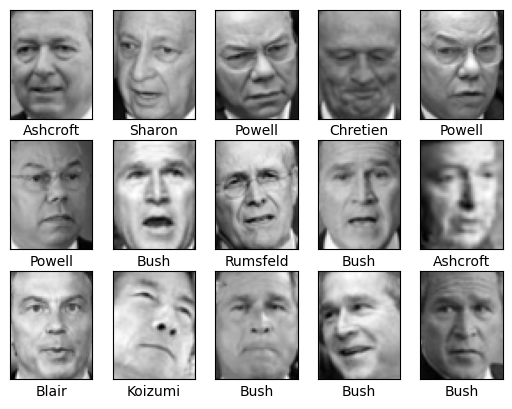

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    img, lbl = get_img_by_row(df.iloc[i])
    axi.imshow(img, cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=lbl.split()[-1])
plt.savefig('persons_pics_img_for_description.png', dpi = 300, bbox_inches='tight')    

Крупнее

(-0.5, 46.5, 61.5, -0.5)

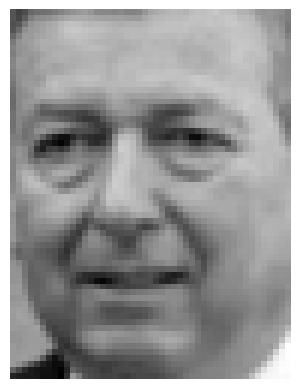

In [ ]:
plt.imshow(df.iloc[0].drop('label').astype(float).to_numpy().reshape(62,47), cmap='gray')
plt.axis('off')

# Немного озорства

Определите число различных людей, фотографии которых содержатся в рассматриваемом наборе данных.

In [ ]:
# < ENTER YOUR CODE HERE > 

12

Постройте гистограмму распределения объектов по классам и вычислите долю объектов каждого класса. 

In [ ]:
# < ENTER YOUR CODE HERE > 

На основе имеющихся данных поставьте в соответствие каждому человеку один вектор, координаты которого являются средним соответствующих координат всех векторов, отождествленных с этим человеком.

In [ ]:
# < ENTER YOUR CODE HERE > 

Вычислите координату с индексом $0$ усредненного вектора, соответствующего человеку из вашего индивидуального задания.

In [ ]:
# < ENTER YOUR CODE HERE > 

Используя усредненные векторы, постройте изображения всех людей из набора данных.

In [ ]:
# < ENTER YOUR CODE HERE > 

В качестве меры "схожести" двух объектов часто используют так называемое [косинусное сходство](https://en.wikipedia.org/wiki/Cosine_similarity). Не следует путать с косинусным расстоянием.

Постройте матрицу "схожести" объектов на основе их усредненных векторов. Для визуализации рекомендуем использовать тепловую карту, например, [из библиотеки seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
# < ENTER YOUR CODE HERE > 

Определите косинусное сходство для пары людей из вашего индивидуального задания на основе соответствующих им "усредненных" векторов.

In [ ]:
# < ENTER YOUR CODE HERE > 

# Построение модели

При помощи <code>train_test_split()</code> разделите набор данных на тренировочный и тестовый с параметрами, указанными в вашем индивидуальном задании. Используйте стратификацию по колонке <code>label</code>.

In [ ]:
# < ENTER YOUR CODE HERE > 

## Первое приближение: базовый SVM классификатор с линейным ядром.

Обучите модель <code>SVC()</code> на тренировочном наборе данных с параметрами, указанными в вашем индивидуальном задании.

In [ ]:
# < ENTER YOUR CODE HERE > 

Оцените модель на тестовых данных. Вычислите <code>f1_score(average='weighted')</code>

In [ ]:
# < ENTER YOUR CODE HERE > 

В целом, достаточно неплохой результат, но имеет смысл попробовать подобрать параметры.

## Подбор гиперпараметров

Используя <code>GridSearchCV()</code>, осуществите подбор гиперпараметров, указанных в вашем задании. Отдельно обратите внимание на время обучения моделей

In [ ]:
# < ENTER YOUR CODE HERE > 

Определите гиперпараметры лучшей полученной модели.

In [ ]:
# < ENTER YOUR CODE HERE > 

Выполните предсказание для тестовых данных при помощи лучшей полученной модели. Вычислите <code>f1_score(average='weighted')</code>.

In [ ]:
# < ENTER YOUR CODE HERE > 

## Уменьшение размерности

Обучение было долгим. Имеет смысл проверить, что будет если уменьшить размерность входных данных, например, при помощи <code>PCA</code>. Обучите модель <code>PCA(svd_solver='full')</code> на тренировочных данных и определите минимальное количество компонент, необходимое для того, чтобы уровень объясненной дисперсии был больше <code>0.95</code>.

In [ ]:
# < ENTER YOUR CODE HERE > 

Заново обучите модель <code>PCA(svd_solver='full')</code> на тренировочных данных с использованием полученного числа ГК. Примените полученное преобразование для тренировочных и тестовых данных.

In [ ]:
# < ENTER YOUR CODE HERE > 

Для полученных после <code>PCA</code> данных аналогично проделанному ранее, то есть используя <code>GridSearchCV()</code>, осуществите подбор гиперпараметров, указанных в вашем задании. Отдельно обратите внимание на время обучения моделей.

In [ ]:
# < ENTER YOUR CODE HERE > 

Определите гиперпараметры лучшей полученной модели.

In [ ]:
# < ENTER YOUR CODE HERE > 

Выполните предсказание для тестовых данных при помощи лучшей полученной модели. Вычислите <code>f1_score(average='weighted')</code>

In [ ]:
# < ENTER YOUR CODE HERE > 

Видно, что качество модели изменилось незначительно, при этом время обучения существенно сократилось.